In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.autograd import Variable
import pickle
import seaborn as sns

sns.set_style("whitegrid")



### load EVs

In [50]:
with open ('results/EVs_2HL.txt', 'rb') as fp:
    EVs_2HL = pickle.load(fp) #list of #points elements with d entries each, which are the eige
    
with open ('results/EVs_4HL.txt', 'rb') as fp:
    EVs_4HL = pickle.load(fp) #list of #points elements with d entries each, 
with open ('results/EVs_8HL.txt', 'rb') as fp:
    EVs_8HL = pickle.load(fp) 
    
with open ('results/EVs_16HL.txt', 'rb') as fp:
    EVs_16HL = pickle.load(fp) 
    
with open ('results/EVs_32HL.txt', 'rb') as fp:
    EVs_32HL = pickle.load(fp) 
    
     
with open ('results/EVs_64HL.txt', 'rb') as fp:
    EVs_64HL = pickle.load(fp) 

compute avg min and max EV

In [53]:
x=0
EVs_2HL_min=np.mean([x+entry[0] for entry in EVs_2HL])
x=0
EVs_2HL_max=np.mean([x+entry[-1] for entry in EVs_2HL])

x=0
EVs_4HL_min=np.mean([x+entry[0] for entry in EVs_4HL])
x=0
EVs_4HL_max=np.mean([x+entry[-1] for entry in EVs_4HL])

x=0
EVs_8HL_min=np.mean([x+entry[0] for entry in EVs_8HL])
x=0
EVs_8HL_max=np.mean([x+entry[-1] for entry in EVs_8HL])

x=0
EVs_16HL_min=np.mean([x+entry[0] for entry in EVs_16HL])
x=0
EVs_16HL_max=np.mean([x+entry[-1] for entry in EVs_16HL])

x=0
EVs_32HL_min=np.mean([x+entry[0] for entry in EVs_32HL])
x=0
EVs_32HL_max=np.mean([x+entry[-1] for entry in EVs_32HL])


x=0
EVs_64HL_min=np.mean([x+entry[0] for entry in EVs_64HL])
x=0
EVs_64HL_max=np.mean([x+entry[-1] for entry in EVs_64HL])



compute avg neg and pos EVs

In [51]:
EVs_2HL_neg_avg=0
for i in range(len(EVs_2HL)):
    EVs_2HL_neg_avg+=torch.mean(EVs_2HL[i][0:(EVs_2HL[i]>=0).nonzero()[0][0]])
EVs_2HL_pos_avg=0
for i in range(len(EVs_2HL)):
    EVs_2HL_pos_avg+=torch.mean(EVs_2HL[i][(EVs_2HL[i]>0).nonzero()[0][0]:len(EVs_2HL[0])])
    

EVs_4HL_neg_avg=0
for i in range(len(EVs_4HL)):
    EVs_4HL_neg_avg+=torch.mean(EVs_4HL[i][0:(EVs_4HL[i]>=0).nonzero()[0][0]])
EVs_4HL_pos_avg=0
for i in range(len(EVs_4HL)):
    EVs_4HL_pos_avg+=torch.mean(EVs_4HL[i][(EVs_4HL[i]>0).nonzero()[0][0]:len(EVs_4HL[0])])
    
EVs_8HL_neg_avg=0
for i in range(len(EVs_8HL)):
    EVs_8HL_neg_avg+=torch.mean(EVs_8HL[i][0:(EVs_8HL[i]>=0).nonzero()[0][0]])
EVs_8HL_pos_avg=0
for i in range(len(EVs_8HL)):
    EVs_8HL_pos_avg+=torch.mean(EVs_8HL[i][(EVs_8HL[i]>0).nonzero()[0][0]:len(EVs_8HL[0])])
    
EVs_16HL_neg_avg=0
for i in range(len(EVs_16HL)):
    EVs_16HL_neg_avg+=torch.mean(EVs_16HL[i][0:(EVs_16HL[i]>=0).nonzero()[0][0]])
EVs_16HL_pos_avg=0
for i in range(len(EVs_16HL)):
    EVs_16HL_pos_avg+=torch.mean(EVs_16HL[i][(EVs_16HL[i]>0).nonzero()[0][0]:len(EVs_16HL[0])])

        
EVs_32HL_neg_avg=0
for i in range(len(EVs_32HL)):
    EVs_32HL_neg_avg+=torch.mean(EVs_32HL[i][0:(EVs_32HL[i]>=0).nonzero()[0][0]])
EVs_32HL_pos_avg=0
for i in range(len(EVs_32HL)):
    EVs_32HL_pos_avg+=torch.mean(EVs_32HL[i][(EVs_32HL[i]>0).nonzero()[0][0]:len(EVs_32HL[0])])    
    
    
        
EVs_64HL_neg_avg=0
for i in range(len(EVs_64HL)):
    EVs_64HL_neg_avg+=torch.mean(EVs_64HL[i][0:(EVs_64HL[i]>=0).nonzero()[0][0]])
EVs_64HL_pos_avg=0
for i in range(len(EVs_64HL)):
    EVs_64HL_pos_avg+=torch.mean(EVs_64HL[i][(EVs_64HL[i]>0).nonzero()[0][0]:len(EVs_64HL[0])])    

## load covariance data

In [39]:
SGD_cov_POS_2HL=torch.load('results/SGD_cov_2HL_POS')# list of #points w/neg curvature with #neg EVs entries each
                                                # ,which are the avg correlation of SGD with that EV.
SGD_cov_NEG_2HL=torch.load('results/SGD_cov_2HL_NEG')
uniform_cov_POS_2HL=torch.load('results/uniform_cov_2HL_POS')
uniform_cov_NEG_2HL=torch.load('results/uniform_cov_2HL_NEG')

SGD_cov_POS_4HL=torch.load('results/SGD_cov_4HL_POS')
SGD_cov_NEG_4HL=torch.load('results/SGD_cov_4HL_NEG')
uniform_cov_POS_4HL=torch.load('results/uniform_cov_4HL_POS')
uniform_cov_NEG_4HL=torch.load('results/uniform_cov_4HL_NEG')

SGD_cov_POS_8HL=torch.load('results/SGD_cov_8HL_POS')
SGD_cov_NEG_8HL=torch.load('results/SGD_cov_8HL_NEG')
uniform_cov_POS_8HL=torch.load('results/uniform_cov_8HL_POS')
uniform_cov_NEG_8HL=torch.load('results/uniform_cov_8HL_NEG')

SGD_cov_POS_16HL=torch.load('results/SGD_cov_16HL_POS')
SGD_cov_NEG_16HL=torch.load('results/SGD_cov_16HL_NEG')
uniform_cov_POS_16HL=torch.load('results/uniform_cov_16HL_POS')
uniform_cov_NEG_16HL=torch.load('results/uniform_cov_16HL_NEG')

SGD_cov_POS_32HL=torch.load('results/SGD_cov_32HL_POS')
SGD_cov_NEG_32HL=torch.load('results/SGD_cov_32HL_NEG')
uniform_cov_POS_32HL=torch.load('results/uniform_cov_32HL_POS')
uniform_cov_NEG_32HL=torch.load('results/uniform_cov_32HL_NEG')


SGD_cov_POS_64HL=torch.load('results/SGD_cov_64HL_POS')
SGD_cov_NEG_64HL=torch.load('results/SGD_cov_64HL_NEG')
uniform_cov_POS_64HL=torch.load('results/uniform_cov_64HL_POS')
uniform_cov_NEG_64HL=torch.load('results/uniform_cov_64HL_NEG')

compute mean variance along negative and positive eigendirections

In [6]:
SGD_cov_POS_2HL_mean= [torch.mean(entry) for entry in SGD_cov_POS_2HL]
SGD_cov_NEG_2HL_mean= [torch.mean(entry) for entry in SGD_cov_NEG_2HL]

uniform_cov_POS_2HL_mean= [torch.mean(entry) for entry in uniform_cov_POS_2HL]
uniform_cov_NEG_2HL_mean= [torch.mean(entry) for entry in uniform_cov_NEG_2HL]


SGD_cov_POS_4HL_mean= [torch.mean(entry) for entry in SGD_cov_POS_4HL]
SGD_cov_NEG_4HL_mean= [torch.mean(entry) for entry in SGD_cov_NEG_4HL]

uniform_cov_POS_4HL_mean= [torch.mean(entry) for entry in uniform_cov_POS_4HL]
uniform_cov_NEG_4HL_mean= [torch.mean(entry) for entry in uniform_cov_NEG_4HL]

SGD_cov_POS_8HL_mean= [torch.mean(entry) for entry in SGD_cov_POS_8HL]
SGD_cov_NEG_8HL_mean= [torch.mean(entry) for entry in SGD_cov_NEG_8HL]

uniform_cov_POS_8HL_mean= [torch.mean(entry) for entry in uniform_cov_POS_8HL]
uniform_cov_NEG_8HL_mean= [torch.mean(entry) for entry in uniform_cov_NEG_8HL]

SGD_cov_POS_16HL_mean= [torch.mean(entry) for entry in SGD_cov_POS_16HL]
SGD_cov_NEG_16HL_mean= [torch.mean(entry) for entry in SGD_cov_NEG_16HL]

uniform_cov_POS_16HL_mean= [torch.mean(entry) for entry in uniform_cov_POS_16HL]
uniform_cov_NEG_16HL_mean= [torch.mean(entry) for entry in uniform_cov_NEG_16HL]

SGD_cov_POS_32HL_mean= [torch.mean(entry) for entry in SGD_cov_POS_32HL]
SGD_cov_NEG_32HL_mean= [torch.mean(entry) for entry in SGD_cov_NEG_32HL]

uniform_cov_POS_32HL_mean= [torch.mean(entry) for entry in uniform_cov_POS_32HL]
uniform_cov_NEG_32HL_mean= [torch.mean(entry) for entry in uniform_cov_NEG_32HL]



compute sum of variance along negative and positive eigendirections

In [40]:
SGD_cov_POS_2HL_sum= [torch.sum(entry) for entry in SGD_cov_POS_2HL]
SGD_cov_NEG_2HL_sum= [torch.sum(entry) for entry in SGD_cov_NEG_2HL]

uniform_cov_POS_2HL_sum= [torch.sum(entry) for entry in uniform_cov_POS_2HL]
uniform_cov_NEG_2HL_sum= [torch.sum(entry) for entry in uniform_cov_NEG_2HL]

SGD_cov_POS_4HL_sum= [torch.sum(entry) for entry in SGD_cov_POS_4HL]
SGD_cov_NEG_4HL_sum= [torch.sum(entry) for entry in SGD_cov_NEG_4HL]

uniform_cov_POS_4HL_sum= [torch.sum(entry) for entry in uniform_cov_POS_4HL]
uniform_cov_NEG_4HL_sum= [torch.sum(entry) for entry in uniform_cov_NEG_4HL]

SGD_cov_POS_8HL_sum= [torch.sum(entry) for entry in SGD_cov_POS_8HL]
SGD_cov_NEG_8HL_sum= [torch.sum(entry) for entry in SGD_cov_NEG_8HL]

uniform_cov_POS_8HL_sum= [torch.sum(entry) for entry in uniform_cov_POS_8HL]
uniform_cov_NEG_8HL_sum= [torch.sum(entry) for entry in uniform_cov_NEG_8HL]

SGD_cov_POS_16HL_sum= [torch.sum(entry) for entry in SGD_cov_POS_16HL]
SGD_cov_NEG_16HL_sum= [torch.sum(entry) for entry in SGD_cov_NEG_16HL]

uniform_cov_POS_16HL_sum= [torch.sum(entry) for entry in uniform_cov_POS_16HL]
uniform_cov_NEG_16HL_sum= [torch.sum(entry) for entry in uniform_cov_NEG_16HL]


SGD_cov_POS_32HL_sum= [torch.sum(entry) for entry in SGD_cov_POS_32HL]
SGD_cov_NEG_32HL_sum= [torch.sum(entry) for entry in SGD_cov_NEG_32HL]

uniform_cov_POS_32HL_sum= [torch.sum(entry) for entry in uniform_cov_POS_32HL]
uniform_cov_NEG_32HL_sum= [torch.sum(entry) for entry in uniform_cov_NEG_32HL]

SGD_cov_POS_64HL_sum= [torch.sum(entry) for entry in SGD_cov_POS_64HL]
SGD_cov_NEG_64HL_sum= [torch.sum(entry) for entry in SGD_cov_NEG_64HL]

uniform_cov_POS_64HL_sum= [torch.sum(entry) for entry in uniform_cov_POS_64HL]
uniform_cov_NEG_64HL_sum= [torch.sum(entry) for entry in uniform_cov_NEG_64HL]

compute variance along left and rightmost eigenvectors

In [43]:
SGD_cov_rightEV_2HL=0
SGD_cov_rightEV_2HL= [SGD_cov_rightEV_2HL+entry[-1] for entry in SGD_cov_POS_2HL]

SGD_cov_leftEV_2HL=0
SGD_cov_leftEV_2HL= [SGD_cov_leftEV_2HL+entry[0] for entry in SGD_cov_NEG_2HL]

SGD_cov_rightEV_4HL=0
SGD_cov_rightEV_4HL= [SGD_cov_rightEV_4HL+entry[-1] for entry in SGD_cov_POS_4HL]

SGD_cov_leftEV_4HL=0
SGD_cov_leftEV_4HL= [SGD_cov_leftEV_4HL+entry[0] for entry in SGD_cov_NEG_4HL]

SGD_cov_rightEV_8HL=0
SGD_cov_rightEV_8HL= [SGD_cov_rightEV_8HL+entry[-1] for entry in SGD_cov_POS_8HL]

SGD_cov_leftEV_8HL=0
SGD_cov_leftEV_8HL= [SGD_cov_leftEV_8HL+entry[0] for entry in SGD_cov_NEG_8HL]

SGD_cov_rightEV_16HL=0
SGD_cov_rightEV_16HL= [SGD_cov_rightEV_16HL+entry[-1] for entry in SGD_cov_POS_16HL]

SGD_cov_leftEV_16HL=0
SGD_cov_leftEV_16HL= [SGD_cov_leftEV_16HL+entry[0] for entry in SGD_cov_NEG_16HL]

SGD_cov_rightEV_32HL=0
SGD_cov_rightEV_32HL= [SGD_cov_rightEV_32HL+entry[-1] for entry in SGD_cov_POS_32HL]

SGD_cov_leftEV_32HL=0
SGD_cov_leftEV_32HL= [SGD_cov_leftEV_32HL+entry[0] for entry in SGD_cov_NEG_32HL]

SGD_cov_rightEV_64HL=0
SGD_cov_rightEV_64HL= [SGD_cov_rightEV_64HL+entry[-1] for entry in SGD_cov_POS_64HL]

SGD_cov_leftEV_64HL=0
SGD_cov_leftEV_64HL= [SGD_cov_leftEV_64HL+entry[0] for entry in SGD_cov_NEG_64HL]

uniform_cov_rightEV_2HL=0
uniform_cov_rightEV_2HL= [uniform_cov_rightEV_2HL+entry[-1] for entry in uniform_cov_POS_2HL]

uniform_cov_leftEV_2HL=0
uniform_cov_leftEV_2HL= [uniform_cov_leftEV_2HL+entry[0] for entry in uniform_cov_NEG_2HL]

uniform_cov_rightEV_4HL=0
uniform_cov_rightEV_4HL= [uniform_cov_rightEV_4HL+entry[-1] for entry in uniform_cov_POS_4HL]

uniform_cov_leftEV_4HL=0
uniform_cov_leftEV_4HL= [uniform_cov_leftEV_4HL+entry[0] for entry in uniform_cov_NEG_4HL]

uniform_cov_rightEV_8HL=0
uniform_cov_rightEV_8HL= [uniform_cov_rightEV_8HL+entry[-1] for entry in uniform_cov_POS_8HL]

uniform_cov_leftEV_8HL=0
uniform_cov_leftEV_8HL= [uniform_cov_leftEV_8HL+entry[0] for entry in uniform_cov_NEG_8HL]

uniform_cov_rightEV_16HL=0
uniform_cov_rightEV_16HL= [uniform_cov_rightEV_16HL+entry[-1] for entry in uniform_cov_POS_16HL]

uniform_cov_leftEV_16HL=0
uniform_cov_leftEV_16HL= [uniform_cov_leftEV_16HL+entry[0] for entry in uniform_cov_NEG_16HL]

uniform_cov_rightEV_32HL=0
uniform_cov_rightEV_32HL= [uniform_cov_rightEV_32HL+entry[-1] for entry in uniform_cov_POS_32HL]

uniform_cov_leftEV_32HL=0
uniform_cov_leftEV_32HL= [uniform_cov_leftEV_32HL+entry[0] for entry in uniform_cov_NEG_32HL]


uniform_cov_rightEV_64HL=0
uniform_cov_rightEV_64HL= [uniform_cov_rightEV_64HL+entry[-1] for entry in uniform_cov_POS_64HL]

uniform_cov_leftEV_64HL=0
uniform_cov_leftEV_64HL= [uniform_cov_leftEV_64HL+entry[0] for entry in uniform_cov_NEG_64HL]


# make plots

SGD COV LEFT RIGHT

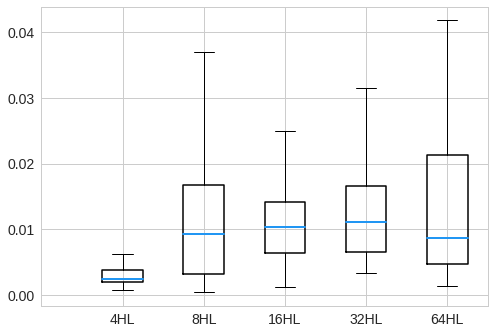

In [67]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[SGD_cov_leftEV_4HL,SGD_cov_leftEV_8HL,SGD_cov_leftEV_16HL,SGD_cov_leftEV_32HL,SGD_cov_leftEV_64HL]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4HL','8HL','16HL','32HL','64HL'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)


fig.savefig('SGD_cov_leftmost_xHL.pdf')

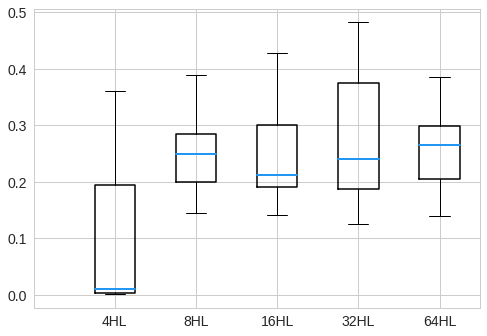

In [60]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[SGD_cov_rightEV_4HL,SGD_cov_rightEV_8HL,SGD_cov_rightEV_16HL,SGD_cov_rightEV_32HL,SGD_cov_rightEV_64HL]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4HL','8HL','16HL','32HL','64HL'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('SGD_cov_rightmost_xHL.pdf')

SGD COV ALL

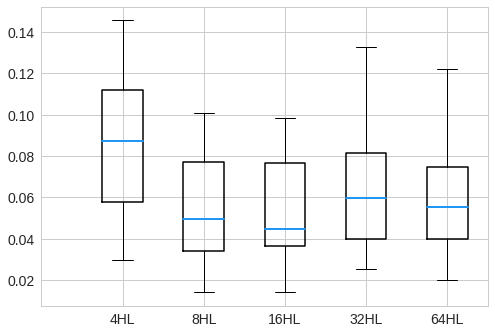

In [61]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[SGD_cov_NEG_4HL_sum,SGD_cov_NEG_8HL_sum,SGD_cov_NEG_16HL_sum,SGD_cov_NEG_32HL_sum,SGD_cov_NEG_64HL_sum]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4HL','8HL','16HL','32HL','64HL'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('SGD_cov_neg_xHL.pdf')

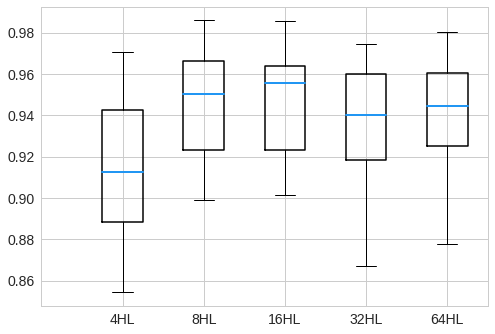

In [62]:
fig = plt.figure(2)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[SGD_cov_POS_4HL_sum,SGD_cov_POS_8HL_sum,SGD_cov_POS_16HL_sum,SGD_cov_POS_32HL_sum,SGD_cov_POS_64HL_sum]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4HL','8HL','16HL','32HL','64HL'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('SGD_cov_pos_xHL.pdf')


UNIFORM LEFT RIGHT

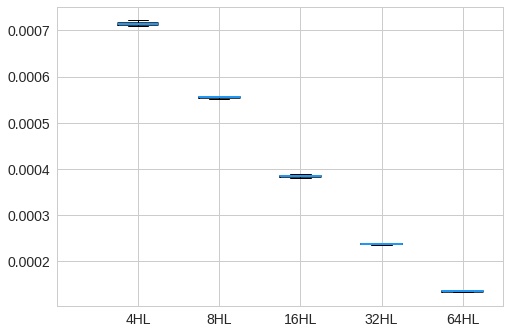

In [63]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[uniform_cov_leftEV_4HL,uniform_cov_leftEV_8HL,uniform_cov_leftEV_16HL,uniform_cov_leftEV_32HL,uniform_cov_leftEV_64HL]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4HL','8HL','16HL','32HL','64HL'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('uniform_cov_leftmost_xHL.pdf')

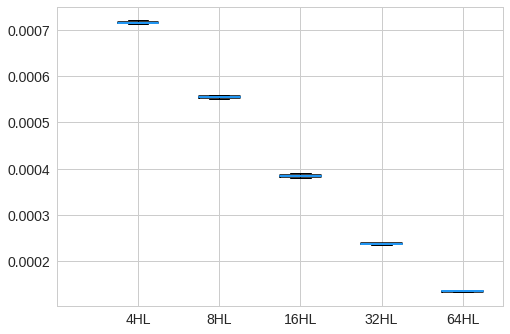

In [64]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[uniform_cov_rightEV_4HL,uniform_cov_rightEV_8HL,uniform_cov_rightEV_16HL,uniform_cov_rightEV_32HL,uniform_cov_rightEV_64HL]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4HL','8HL','16HL','32HL','64HL'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('uniform_cov_rightmost_xHL.pdf')

ALL

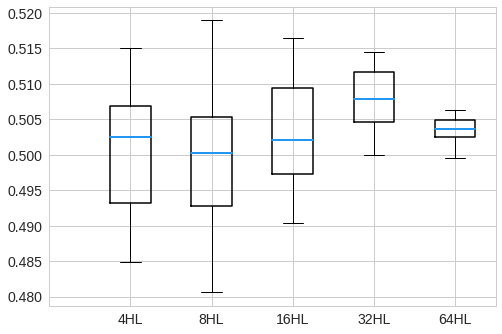

In [65]:
fig = plt.figure(2)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[uniform_cov_NEG_4HL_sum,uniform_cov_NEG_8HL_sum,uniform_cov_NEG_16HL_sum,uniform_cov_NEG_32HL_sum,uniform_cov_NEG_64HL_sum]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4HL','8HL','16HL','32HL','64HL'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('uniform_cov_neg_xHL.pdf')


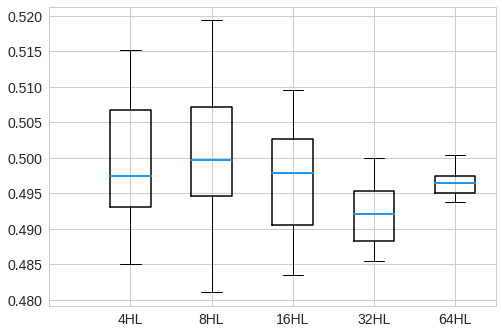

In [66]:
fig = plt.figure(2)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[uniform_cov_POS_4HL_sum,uniform_cov_POS_8HL_sum,uniform_cov_POS_16HL_sum,uniform_cov_POS_32HL_sum,uniform_cov_POS_64HL_sum]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4HL','8HL','16HL','32HL','64HL'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('uniform_cov_pos_xHL.pdf')


EIGENVALUES

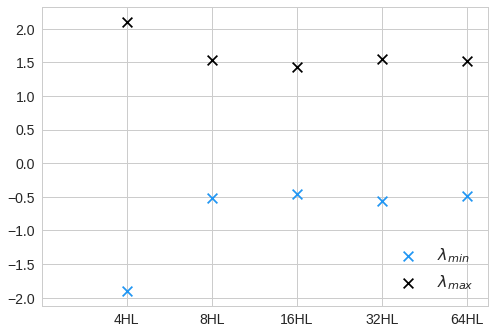

In [57]:
#plt.plot([1,2,3,4,5], [EVs_2HL_min,EVs_4HL_min,EVs_8HL_min,EVs_16HL_min,EVs_32HL_min],'b.',[1,2,3,4,5],
 #        [EVs_2HL_max,EVs_4HL_max,EVs_8HL_max,EVs_16HL_max,EVs_32HL_max], 
  #       'k.',markersize=12)
fig = plt.figure(200)


plt.scatter([1,2,3,4,5], [EVs_4HL_min,EVs_8HL_min,EVs_16HL_min,EVs_32HL_min,EVs_64HL_min], s=95,marker='x', color='#2196F3')
plt.scatter([1,2,3,4,5],
         [EVs_4HL_max,EVs_8HL_max,EVs_16HL_max,EVs_32HL_max,EVs_64HL_max],marker='x',color='k',s=95)
  

# plt.yscale('log') <- TODO
plt.xticks(np.arange(6),('','4HL','8HL','16HL','32HL','64HL'),fontsize=14)
plt.yticks(fontsize=14)

legend=['$\lambda_{min}$','$\lambda_{max}$']
plt.legend(legend,fontsize=16)

fig.savefig('EVs_xHL.pdf')
